In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import RFE

In [2]:
bike = pd.read_csv("day.csv")

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [3]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [4]:
#summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
###Data Visualisation

In [10]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

In [11]:
'''Visualising Numeric Variables
Let's make a pairplot of all the numeric variables, to visualise which variables are most correlated to the target variable 'count'.'''

"Visualising Numeric Variables\nLet's make a pairplot of all the numeric variables, to visualise which variables are most correlated to the target variable 'count'."

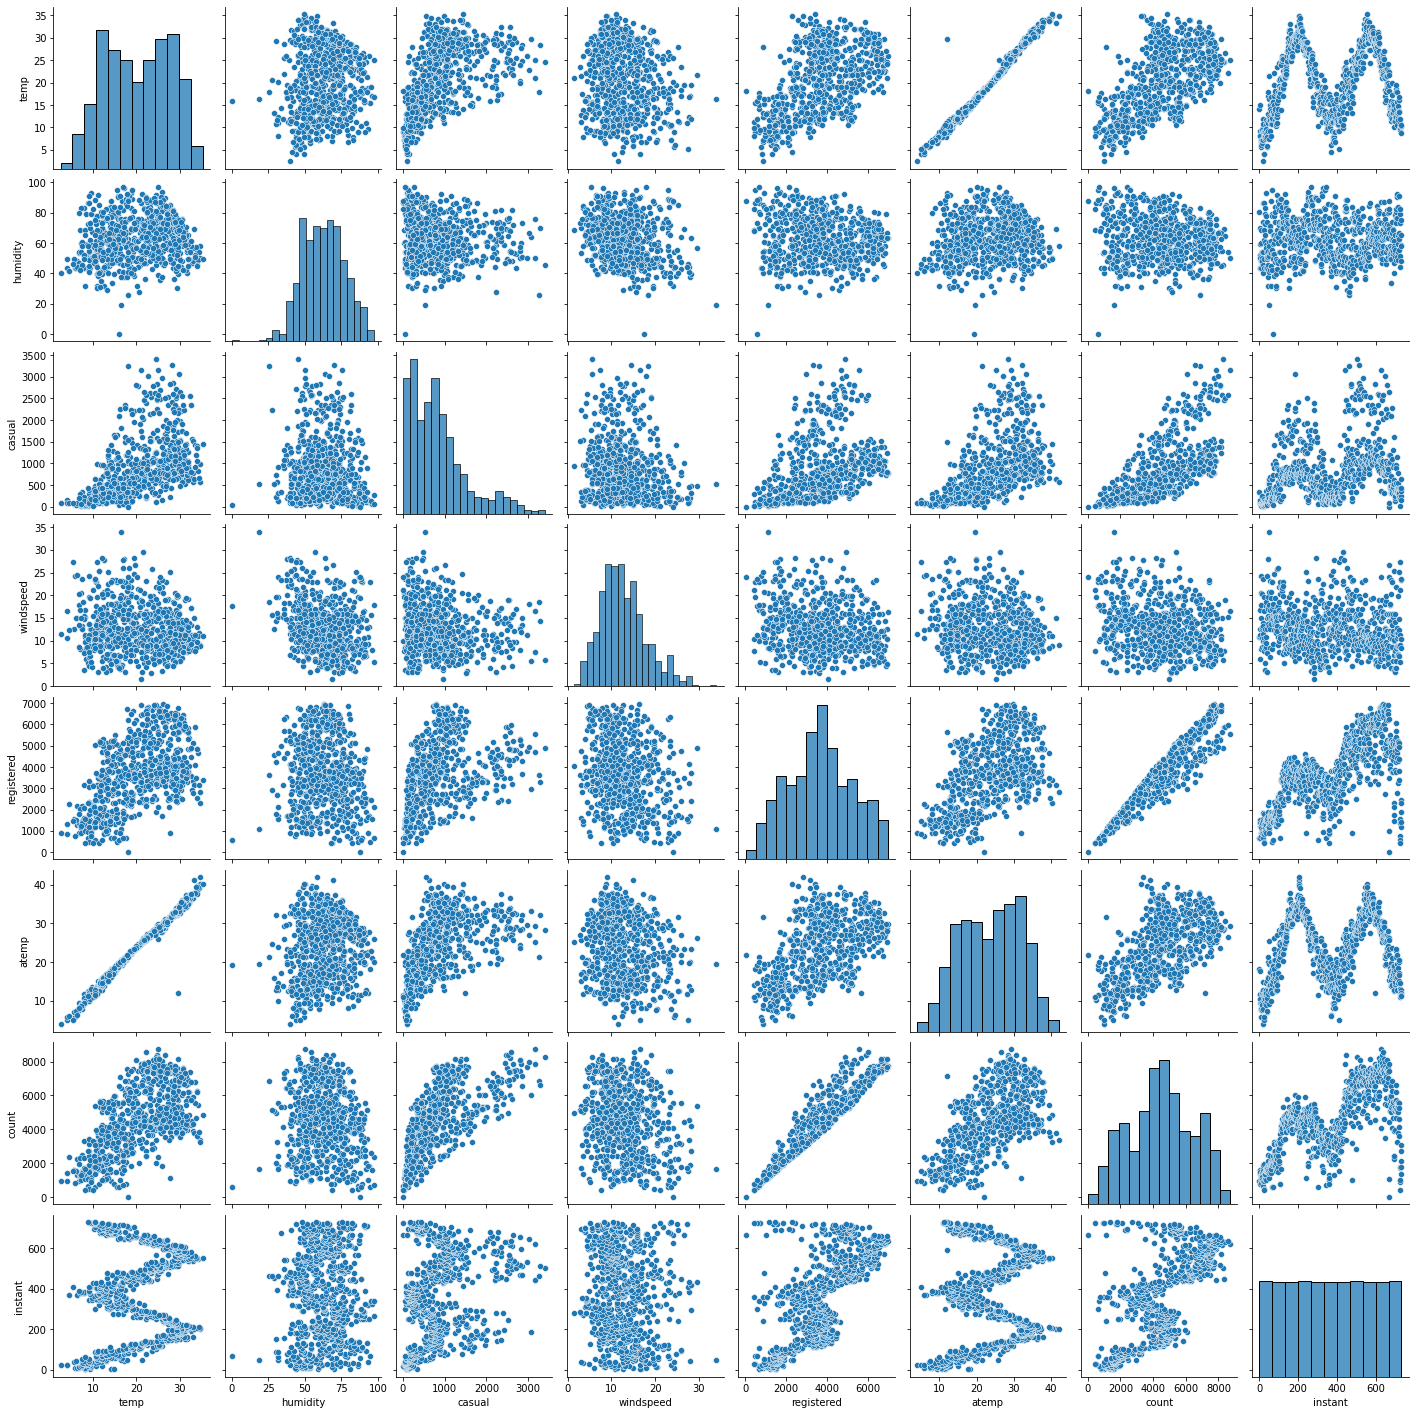

In [12]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()


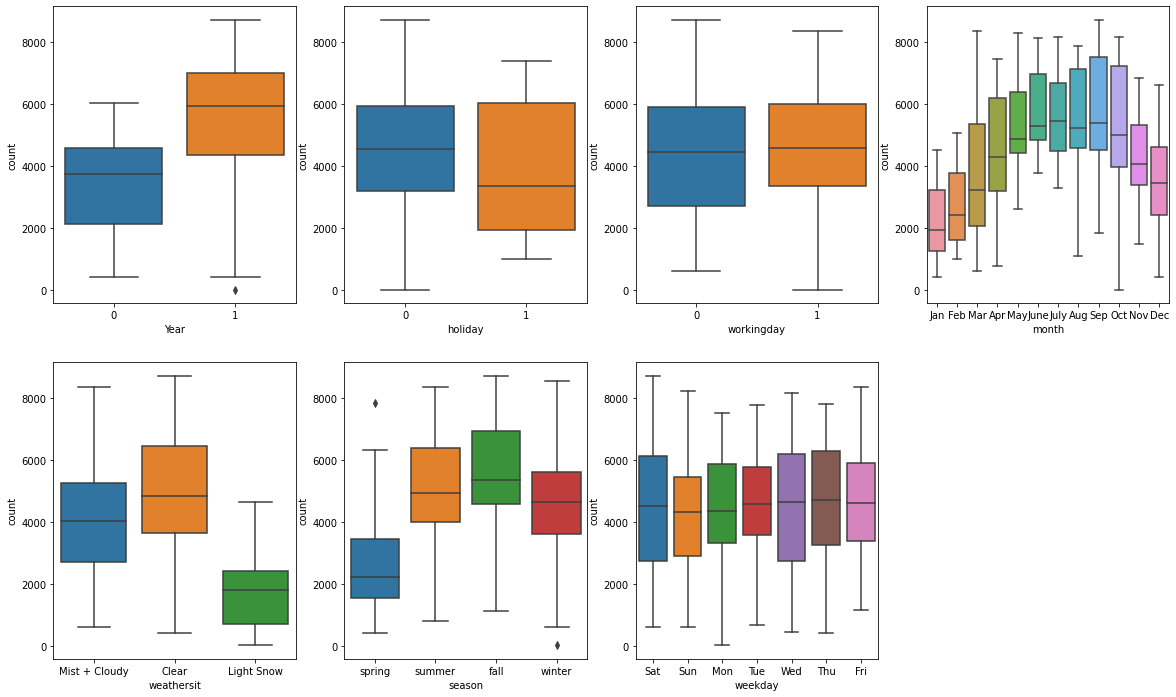

In [13]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


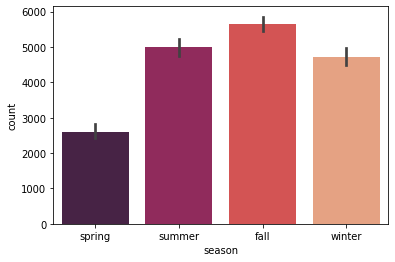

In [14]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=bike,palette="rocket",)
plt.show()

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


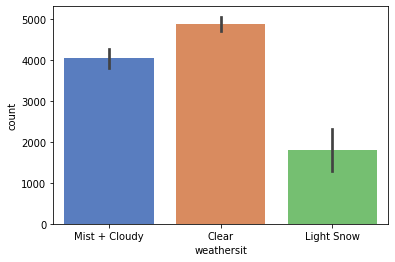

In [15]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=bike)
plt.show()
           

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


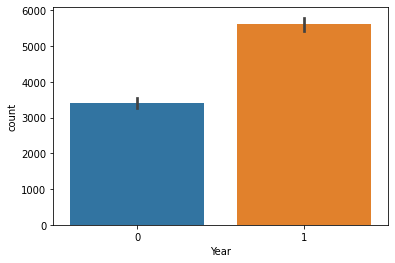

In [16]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=bike)
plt.show()

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


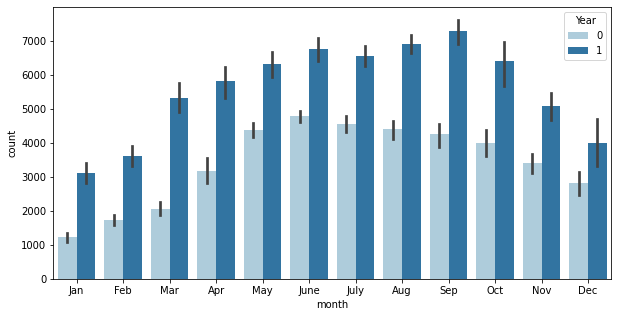

In [17]:
#Relation between month and year
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=bike,palette='Paired')
plt.show()

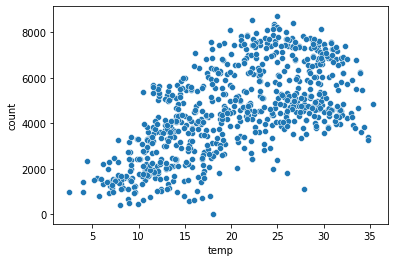

In [18]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

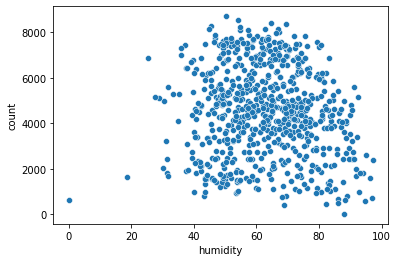

In [19]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

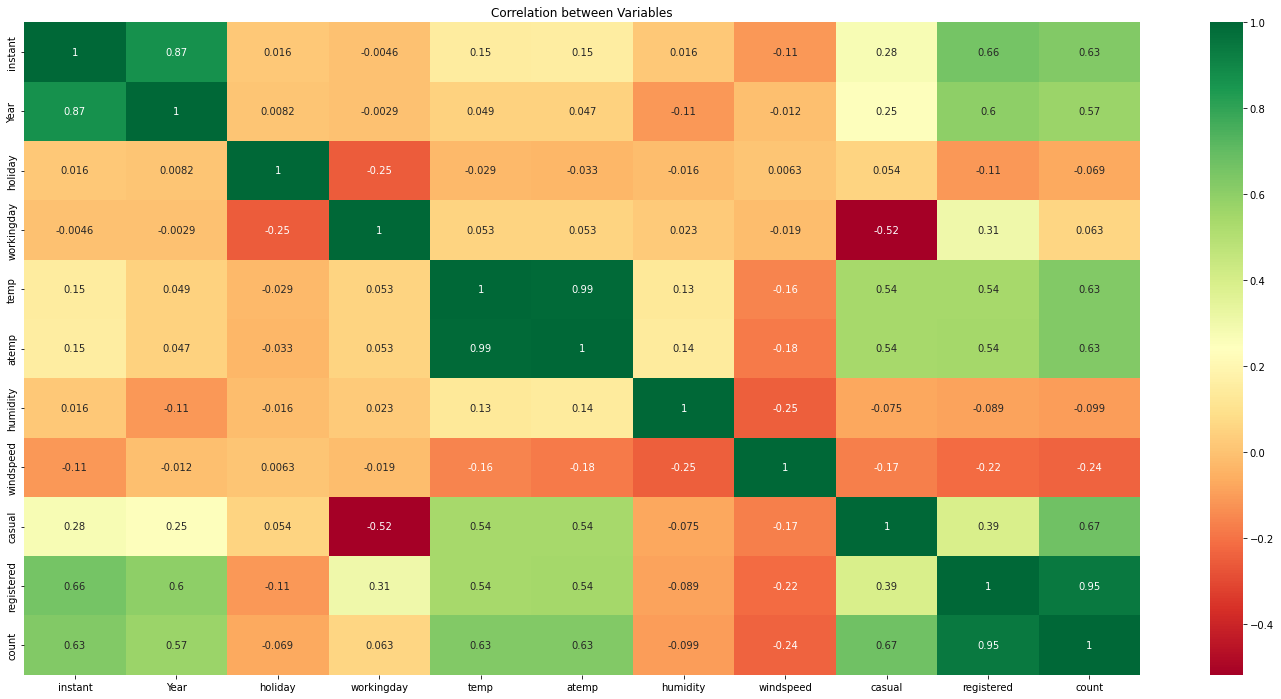

In [20]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [21]:
#drop unnecessary columns
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [22]:
#Checking datatypes of all the columns
bike.dtypes


season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [23]:


# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

#bike=pd.concat([seasons,bike], axis=1)

In [24]:
# Add the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [25]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [26]:
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [27]:
#Number of rows and columns
bike.shape

(730, 29)

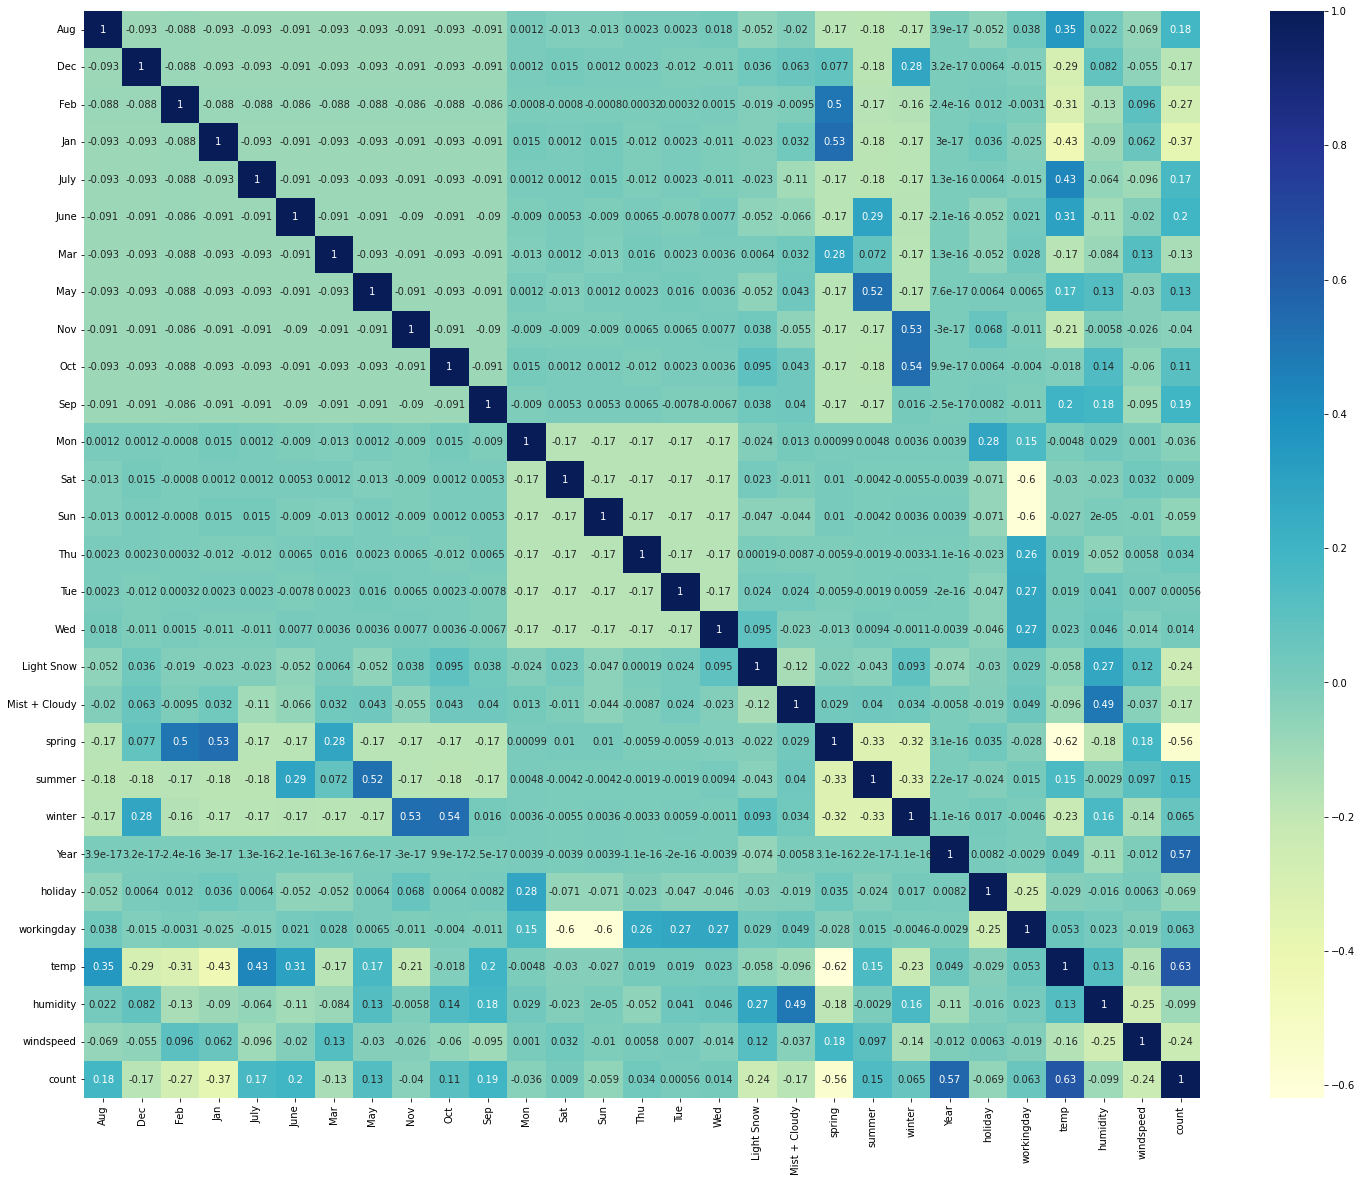

In [28]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [29]:
#Before model building, you first need to perform the test-train split and scale the features.
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [30]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [31]:
"""Rescaling the Features¶
It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

Min-Max scaling (Normalisation):Between 0 and 1

Standardisation :mean-0, sigma-1"""


#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [32]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


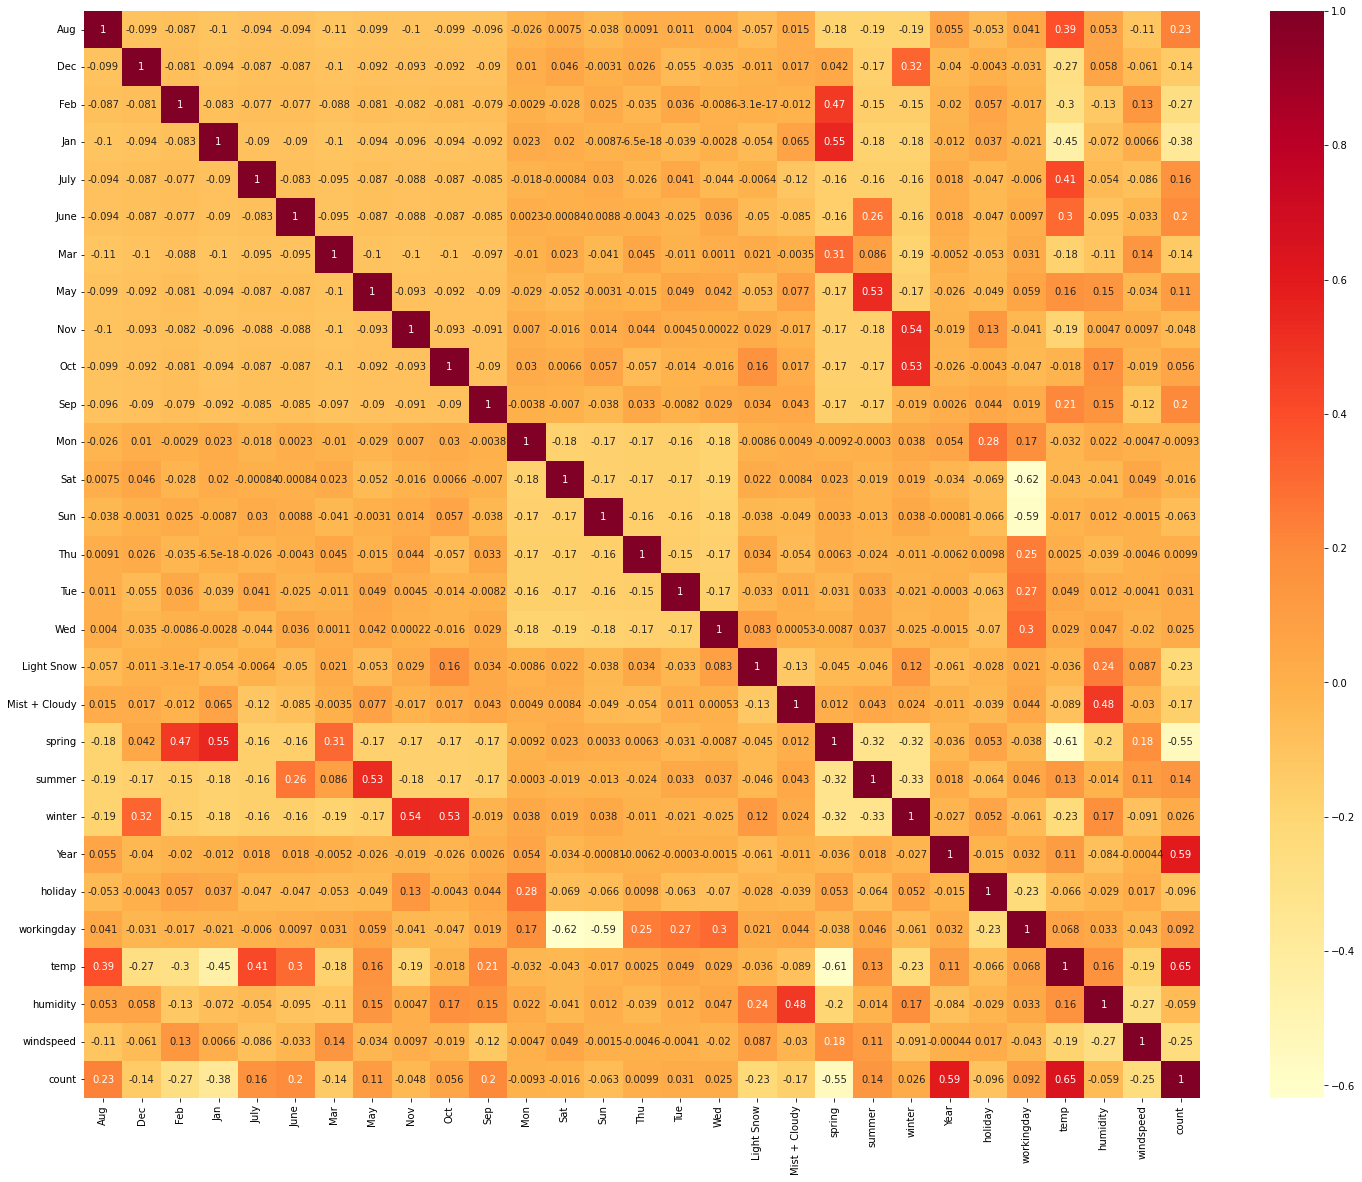

In [33]:
#All the numeric variables are now mapped between 0 and 1

#Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors


# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()


In [34]:
'''From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.'''

"From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high."

In [35]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

In [36]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.00e-181
Time:                        19:36:28   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
Year              0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
humidity         -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.10e+16
================================================================

In [37]:
#Checking VIF
#Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

#𝑉𝐼𝐹𝑖=11−𝑅𝑖2

In [38]:
col = ['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed']

In [39]:
col

['Jan',
 'July',
 'Sep',
 'Sat',
 'Light Snow',
 'Mist + Cloudy',
 'spring',
 'summer',
 'winter',
 'Year',
 'holiday',
 'workingday',
 'temp',
 'humidity',
 'windspeed']

In [40]:
X_train_rfe = X_train[col]

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,Year,2.09
3,Sat,1.98


In [42]:
#January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [43]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train_new1)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.11e-191
Time:                        19:36:28   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714      0.000       0.170       0.310
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0530      0.015      3.648      0.000       0.024       0.082
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
Year              0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday        0.0430      0.012      3.725      0.000       0.020       0.066
temp              0.5277      0.033     15.884      0.000       0.462       0.593
humidity         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Drop the constant term B0
x_train_sm = x_train_sm.drop(['const'], axis=1)

In [45]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train_new1)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.11e-191
Time:                        19:36:28   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714      0.000       0.170       0.310
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0530      0.015      3.648      0.000       0.024       0.082
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
Year              0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday        0.0430      0.012      3.725      0.000       0.020       0.066
temp              0.5277      0.033     15.884      0.000       0.462       0.593
humidity         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,Year,2.08
2,Sat,1.97


In [47]:
#'humidity' variable can be dropped as its insignificant by looking at very high VIF

#Drop humidity
X_train_new2 = x_train_sm.drop(["humidity"], axis = 1)

In [48]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train_new2)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.28e-188
Time:                        19:36:28   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126      0.000       0.097       0.218
July             -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep               0.0759      0.017      4.537      0.000       0.043       0.109
Sat               0.0579      0.015      3.924      0.000       0.029       0.087
Light Snow       -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0477      0.015      3.180      0.002       0.018       0.077
winter            0.0846      0.017      4.971      0.000       0.051       0.118
Year              0.2337      0.008     28.828      0.000       0.218       0.250
holiday          -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday        0.0461      0.012      3.931      0.000       0.023       0.069
temp              0.4915      0.033     15.027      0.000       0.427       0.556
windspeed        -0.1491      0.025     -6.024      0.000      -0.198      -0.100
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Drop the constant term B0
x_train_sm = x_train_sm.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
5,spring,2.49
6,summer,2.34
8,Year,2.07
7,winter,1.98
2,Sat,1.96
0,July,1.58
4,Mist + Cloudy,1.57


In [51]:
#Holiday variable seems to be insignificant, by looking at p value and low VIF. We can drop it

X_train_new3 = x_train_sm.drop(["holiday"], axis = 1)

In [52]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train_new3)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.12e-189
Time:                        19:36:28   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881      0.000       0.089       0.209
July             -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep               0.0740      0.017      4.414      0.000       0.041       0.107
Sat               0.0664      0.014      4.671      0.000       0.038       0.094
Light Snow       -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Mist + Cloudy    -0.0817      0.009     -9.428      0.000      -0.099      -0.065
spring           -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer            0.0481      0.015      3.196      0.001       0.019       0.078
winter            0.0838      0.017      4.910      0.000       0.050       0.117
Year              0.2339      0.008     28.756      0.000       0.218       0.250
workingday        0.0545      0.011      4.938      0.000       0.033       0.076
temp              0.4920      0.033     14.991      0.000       0.427       0.556
windspeed        -0.1499      0.025     -6.040      0.000      -0.199      -0.101
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the VIFs for the new model

#Drop constant 
#Drop the constant term B0
x_train_sm = x_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = x_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,Year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,Mist + Cloudy,1.57


In [54]:
X_train_new3 = x_train_sm.drop(["windspeed"], axis = 1)

In [55]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train_new3)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.94e-182
Time:                        19:36:28   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248      0.001       0.039       0.159
July             -0.0487      0.019     -2.554      0.011      -0.086      -0.011
Sep               0.0783      0.017      4.517      0.000       0.044       0.112
Sat               0.0642      0.015      4.367      0.000       0.035       0.093
Light Snow       -0.3032      0.025    -12.045      0.000      -0.353      -0.254
Mist + Cloudy    -0.0799      0.009     -8.919      0.000      -0.098      -0.062
spring           -0.0760      0.022     -3.528      0.000      -0.118      -0.034
summer            0.0381      0.015      2.462      0.014       0.008       0.068
winter            0.0850      0.018      4.811      0.000       0.050       0.120
Year              0.2329      0.008     27.665      0.000       0.216       0.249
workingday        0.0556      0.011      4.866      0.000       0.033       0.078
temp              0.5038      0.034     14.860      0.000       0.437       0.570
==============================================================================
Omnibus:                       76.254   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.812
Skew:                          -0.729   Prob(JB):                     1.67e-46
Kurtosis:                       5.792   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs for the new model

#Drop constant 
#Drop the constant term B0
x_train_sm = x_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.03
9,workingday,4.63
8,Year,2.07
6,summer,2.06
2,Sat,1.81
5,spring,1.78
7,winter,1.73
0,July,1.58
4,Mist + Cloudy,1.57
1,Sep,1.34


In [57]:
X_train_new4 = x_train_sm.drop(["July"], axis = 1)

In [58]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train_new4)

# create a model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.10e-182
Time:                        19:36:29   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964      0.003       0.030       0.150
Sep               0.0916      0.017      5.508      0.000       0.059       0.124
Sat               0.0645      0.015      4.365      0.000       0.035       0.094
Light Snow       -0.3041      0.025    -12.017      0.000      -0.354      -0.254
Mist + Cloudy    -0.0786      0.009     -8.743      0.000      -0.096      -0.061
spring           -0.0650      0.021     -3.060      0.002      -0.107      -0.023
summer            0.0527      0.014      3.642      0.000       0.024       0.081
winter            0.0970      0.017      5.666      0.000       0.063       0.131
Year              0.2334      0.008     27.580      0.000       0.217       0.250
workingday        0.0566      0.011      4.924      0.000       0.034       0.079
temp              0.4914      0.034     14.564      0.000       0.425       0.558
==============================================================================
Omnibus:                       77.597   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.504
Skew:                          -0.754   Prob(JB):                     1.44e-45
Kurtosis:                       5.728   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculate the VIFs for the new model

#Drop constant 
#Drop the constant term B0
x_train_sm = x_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,Year,2.07
1,Sat,1.81
5,summer,1.75
4,spring,1.70
6,winter,1.59
3,Mist + Cloudy,1.57
0,Sep,1.23
2,Light Snow,1.07


In [60]:
X_train_new4

,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp
576,0,0,0,0,0,0,0,1,1,0.815169
426,0,1,0,1,1,0,0,1,0,0.442393
728,0,0,0,0,1,0,0,1,0,0.245101
482,0,1,0,1,0,1,0,1,0,0.395666
111,0,0,0,1,0,1,0,0,1,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,1,0.863973
53,0,0,0,0,1,0,0,0,1,0.202618
350,0,1,0,1,0,0,1,0,0,0.248216
79,0,0,0,1,0,1,0,0,1,0.462664


In [61]:
#Residual Analysis of the train data
#So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
X_train_new4=sm.add_constant(X_train_new4)
y_train_pred = lr_model.predict(X_train_new4)

In [63]:
y_train_pred

576    0.780657
426    0.461868
728    0.379034
482    0.556518
111    0.290687
         ...   
578    0.804639
53     0.181351
350    0.295046
79     0.348100
520    0.649053
Length: 510, dtype: float64

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

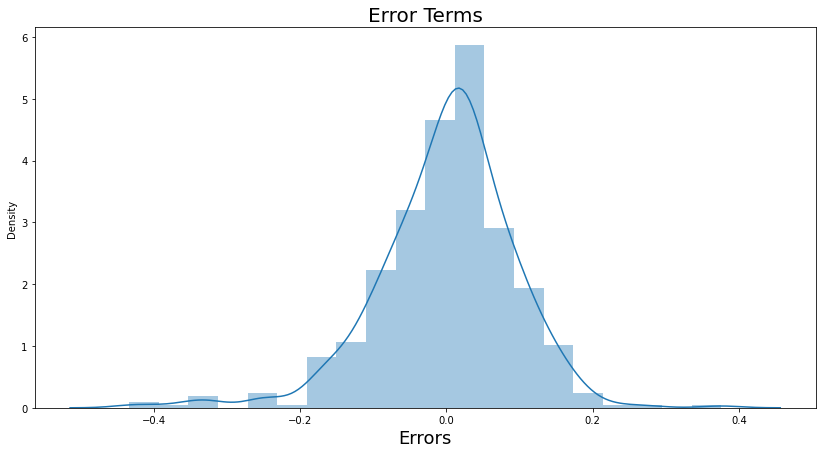

In [64]:
%matplotlib inline
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [65]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\saura\Anaconda3\envs\Django\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [66]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [67]:
#Columns
X_train_new4.columns

Index(['const', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'workingday', 'temp'],
      dtype='object')

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new4 = X_train_new4.drop(['const'], axis=1)
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp
184,1.0,0,0,0,1,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,0,0,1,0,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,1,0,0,1,0.817246


In [69]:
# Making predictions
y_pred = lr_model.predict(X_test_new1)

In [70]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8115083592040954

In [71]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


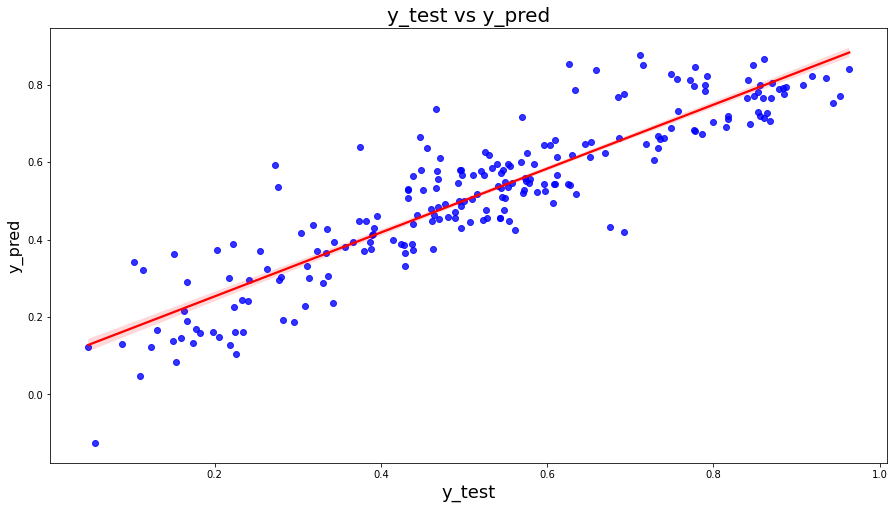

In [72]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [73]:
# We can see that the equation of our best fitted line is:

# 𝑐𝑜𝑢𝑛𝑡=0.4914×𝑡𝑒𝑚𝑝+0.0916×𝑆𝑒𝑝𝑡𝑒𝑚𝑏𝑒𝑟+0.0645×𝑆𝑎𝑡𝑢𝑟𝑑𝑎𝑦+0.0527×𝑠𝑢𝑚𝑚𝑒𝑟+0.0970×𝑤𝑖𝑛𝑡𝑒𝑟+0.2334×𝑌𝑒𝑎𝑟+0.0566×𝑤𝑜𝑟𝑘𝑖𝑛𝑔𝑑𝑎𝑦−0.03041×𝑙𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤−0.0786×𝑚𝑖𝑠𝑡𝑐𝑙𝑜𝑢𝑑𝑦−0.065×𝑠𝑝𝑟𝑖𝑛𝑔

In [74]:
#Interpretation:
#- We arrived at a very decent model for the the demand for shared bikes with the significant variables
#- We can see that temperature variable is having the highest coefficient 0.4914, which means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units.
#Similary we can see coefficients of other variables in the equation for best fitted line.
#We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

In [75]:
"temp", "humidity",'casual','windspeed','registered','atemp','count','instant'

('temp',
 'humidity',
 'casual',
 'windspeed',
 'registered',
 'atemp',
 'count',
 'instant')

In [82]:
corr_matrix=bike.corr()
corr_matrix["count"].sort_values(ascending=False)

count            1.000000
temp             0.627044
Year             0.569728
June             0.195568
Sep              0.194664
Aug              0.182100
July             0.166236
summer           0.145325
May              0.132553
Oct              0.108846
winter           0.064619
workingday       0.062542
Thu              0.033551
Wed              0.014012
Sat              0.009012
Tue              0.000560
Mon             -0.035991
Nov             -0.040344
Sun             -0.059146
holiday         -0.068764
humidity        -0.098543
Mar             -0.128456
Mist + Cloudy   -0.170686
Dec             -0.173878
windspeed       -0.235132
Light Snow      -0.240602
Feb             -0.273848
Jan             -0.367167
spring          -0.561702
Name: count, dtype: float64

In [83]:
𝑐𝑜𝑢𝑛𝑡=
0.4914×𝑡𝑒𝑚𝑝
+0.0916×𝑆𝑒𝑝𝑡𝑒𝑚𝑏𝑒𝑟
+0.0645×𝑆𝑎𝑡𝑢𝑟𝑑𝑎𝑦
+0.0527×𝑠𝑢𝑚𝑚𝑒𝑟
+0.0970×𝑤𝑖𝑛𝑡𝑒𝑟
+0.2334×𝑌𝑒𝑎𝑟
+0.0566×𝑤𝑜𝑟𝑘𝑖𝑛𝑔𝑑𝑎𝑦
−0.03041×𝑙𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤
−0.0786×𝑚𝑖𝑠𝑡𝑐𝑙𝑜𝑢𝑑𝑦
−0.065×𝑠𝑝𝑟𝑖𝑛𝑔

SyntaxError: invalid syntax (<ipython-input-83-f9309b2283db>, line 1)

In [85]:
result = [0.4914
,0.0916
,0.0645
,0.0527
,0.0970
,0.2334
,0.0566
,0.03041
,0.0786
,0.065]

In [89]:
result.sort(reverse = True)
print(result)

[0.4914, 0.2334, 0.097, 0.0916, 0.0786, 0.065, 0.0645, 0.0566, 0.0527, 0.03041]
